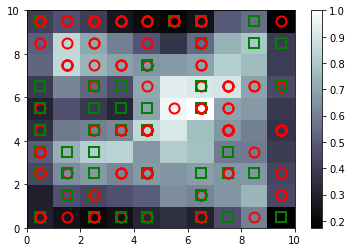

In [43]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv(r'D:\MachineLearning\NN_Templates\Self_Organizing_Maps\train.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [44]:
# Finding the frauds
mappings = som.win_map(X)
frauds = mappings[(6,5)]
frauds = sc.inverse_transform(frauds)

In [45]:
frauds

array([[1.5568162e+07, 0.0000000e+00, 1.9500000e+01, 1.6500000e-01,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 3.8000000e+02, 1.0000000e+00],
       [1.5745375e+07, 0.0000000e+00, 3.3080000e+01, 1.6250000e+00,
        2.0000000e+00, 2.0000000e+00, 4.0000000e+00, 5.4000000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5654625e+07, 0.0000000e+00, 5.3330000e+01, 1.6500000e-01,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 6.2000000e+01, 2.8000000e+01],
       [1.5662152e+07, 0.0000000e+00, 2.9750000e+01, 6.6500000e-01,
        2.0000000e+00, 9.0000000e+00, 4.0000000e+00, 2.5000000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00,

In [46]:
# The dependant variables
customers = dataset.iloc[:, 1:].values
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [48]:
from keras.models import Sequential 
from keras.layers import Dense

In [49]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 5)

Epoch 1/5
532/532 [==============================] - 1s 2ms/step - loss: 0.5329 - acc: 0.9718
Epoch 2/5
532/532 [==============================] - 1s 1ms/step - loss: 0.2214 - acc: 0.9756
Epoch 3/5
532/532 [==============================] - 1s 1ms/step - loss: 0.1160 - acc: 0.9756
Epoch 4/5
532/532 [==============================] - 1s 1ms/step - loss: 0.0850 - acc: 0.9756
Epoch 5/5
532/532 [==============================] - 1s 1ms/step - loss: 0.0690 - acc: 0.9756


In [50]:
dataset.iloc[:,0:1]

,CustomerID
0,15776156
1,15739548
2,15662854
3,15687688
4,15715750
5,15571121
6,15726466
7,15660390
8,15663942
9,15638610


In [51]:
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:,1].argsort()]
y_pred

array([[1.56214230e+07, 4.96831897e-04],
       [1.56227290e+07, 1.09742035e-03],
       [1.56276990e+07, 1.19159662e-03],
       ...,
       [1.58005540e+07, 2.90639043e-01],
       [1.57901130e+07, 3.03092182e-01],
       [1.56458200e+07, 3.03092182e-01]])

In [65]:
new_dataset = pd.read_csv(r'D:\MachineLearning\NN_Templates\Self_Organizing_Maps\test.csv')
new_customers = new_dataset.iloc[:, 1:].values
new_customers = sc.fit_transform(new_customers)

In [71]:
new_y_pred = classifier.predict(new_customers)
new_y_pred.shape

(91, 1)

In [67]:
new_dataset.iloc[:,0:1]

,CustomerID
0,15613699
1,15609758
2,15762392
3,15693382
4,15791769
5,15712483
6,15636454
7,15710138
8,15571571
9,15638751


In [72]:
new_y_pred = np.concatenate((new_dataset.iloc[:,0:1].values, new_y_pred), axis = 1)
new_y_pred = new_y_pred[new_y_pred[:,1].argsort()]
new_y_pred

array([[1.57076810e+07, 9.05257592e-04],
       [1.57117590e+07, 1.17767998e-03],
       [1.55985860e+07, 1.23562152e-03],
       [1.57017380e+07, 1.58204150e-03],
       [1.57403560e+07, 1.61696330e-03],
       [1.56651810e+07, 2.18709186e-03],
       [1.56653740e+07, 2.35467404e-03],
       [1.55874430e+07, 2.43269885e-03],
       [1.56326690e+07, 2.82910396e-03],
       [1.56933820e+07, 2.90339510e-03],
       [1.57526010e+07, 3.08902236e-03],
       [1.57684490e+07, 3.31282872e-03],
       [1.56156700e+07, 4.72133514e-03],
       [1.55911070e+07, 4.89601120e-03],
       [1.55946510e+07, 5.25144301e-03],
       [1.57693560e+07, 5.69881033e-03],
       [1.56675880e+07, 5.81501191e-03],
       [1.56136990e+07, 6.17731176e-03],
       [1.56674600e+07, 6.18020771e-03],
       [1.57967870e+07, 6.21787645e-03],
       [1.58082230e+07, 6.36057742e-03],
       [1.55693940e+07, 6.73953211e-03],
       [1.56901690e+07, 7.17027299e-03],
       [1.55924120e+07, 7.39722792e-03],
       [1.557236